In [50]:
import pandas as pd
import xarray as xr
import glob
import os
import netCDF4
import scipy
from scipy import stats
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
from datetime import datetime, timedelta


In [51]:
# FUNCTION TO PLOT SINGLE INSTANTANEOUS MAPS -  to be externalised

def single_plot(alti_20,min_sl,max_sl,counter,fig,title):

    lon = alti_20.lon.values
    lat = alti_20.lat.values
    ssh = alti_20.sla_predicted.values
    max_lat = 61.0
    min_lat = 50.0
    max_lon = 12.2
    min_lon = -4.0
    
    
    
    """Displaying the unstructured grid in a scatterplot:"""
    # 

    #fig = plt.plot()
    #plt.rcParams.update({'font.size': 15})
    #plt.plot
    #plt.rcParams["figure.figsize"] = (50,10) #Increase figure size
    ax=fig.add_subplot(1,3,counter,projection=ccrs.PlateCarree())
    
    ax.set_xticks(np.arange(min_lon,max_lon,2), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(min_lat,max_lat,1), crs=ccrs.PlateCarree())    
    
    #ax = plt.axes(projection=ccrs.Miller()) 
    img=plt.scatter(lon, lat, c=ssh, s=60, cmap='cool', alpha=1,marker='s') 
    ax.coastlines(resolution='10m', color='black', linewidth=1) 
    plt.xlim(min_lon,max_lon)
    plt.ylim(min_lat,max_lat)

    lon_formatter = cart.mpl.ticker.LongitudeFormatter(number_format='.1f', 
                                      degree_symbol='', 
                                      dateline_direction_label=True)
    lat_formatter = cart.mpl.ticker.LatitudeFormatter(number_format='.1f', 
                                     degree_symbol='')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter) 
    plt.title(title)
    plt.colorbar(img,label=r'SLA (m)',orientation = 'horizontal',pad = 0.1)
    plt.clim(min_sl, max_sl)
    
    import cartopy.feature as feature
    ax.add_feature(feature.LAND,zorder=1)

    
    #plt.show() #a window will show up, allowing the user to see and download the plot
    
    return 


In [52]:
alti_ML = pd.read_csv('/DGFI8/H/work_marcello/machine_learning_altimetry/test_prediction_newpoints_surge_northsea2021_01to12.csv',index_col=[0],parse_dates=[0])

# FROM COPERNICUS MODEL:
#alti_Copernicus = pd.read_csv('/DGFI8/H/work_marcello/machine_learning_altimetry/test_prediction_newpoints_surge_copernicus.csv',index_col=[7],parse_dates=[7])

# FROM CMEMS:
alti_cmems = pd.read_csv('/DGFI8/H/work_marcello/machine_learning_altimetry/test_prediction_newpoints_surge_cmems_NORTHSEA_allsat.csv',index_col=[5],parse_dates=[5])


# alti_Copernicus.lat = round(alti_Copernicus.lat,3)
# alti_ML.lat = round(alti_ML.lat,3)
# alti_cmems.lat = round(alti_cmems.lat,3)

# alti_Copernicus.lon = round(alti_Copernicus.lon,3)
# alti_ML.lon = round(alti_ML.lon,3)
# alti_cmems.lon = round(alti_cmems.lon,3)


In [53]:
# # ATTEMPT: SMOOTH THE SEA LEVEL TEMPORALLY


# import statsmodels.api as sm


# #create a copy of alti_ML_filter
# alti_ML_filter = alti_ML.copy()

# #take one day to list the lat-lon points
# chosen_day='2004-04-24'
# chosen_day=alti_ML_filter.loc[chosen_day:chosen_day]





# for lat_index in np.arange(0,np.shape(chosen_day.lat.values)[0]) :
    
#     #print(lat_index)
#     vector_to_filter = alti_ML_filter.loc[ (alti_ML_filter['lat'] == chosen_day.lat.values[lat_index]) & (alti_ML_filter['lon'] == chosen_day.lon.values[lat_index]), 'sla_predicted'].values
#     time_values = alti_ML_filter.loc[ (alti_ML_filter['lat'] == chosen_day.lat.values[lat_index]) & (alti_ML_filter['lon'] == chosen_day.lon.values[lat_index]), 'times'].values


#     # LOESS FILTER IN TIME
#     lowess_sm = sm.nonparametric.lowess
#     points_to_filter = 30 
#     frac_loess = points_to_filter/np.size(vector_to_filter)
#     vector_filtered = lowess_sm(vector_to_filter,time_values,frac=frac_loess,it=3, return_sorted = False,missing='drop')

#     alti_ML_filter.loc[ (alti_ML_filter['lat'] == chosen_day.lat.values[lat_index]) & (alti_ML_filter['lon'] == chosen_day.lon.values[lat_index]), 'sla_predicted'] = vector_filtered

# #alti_ML_filter.loc[ (alti_ML_filter['lat'] == 50.125) & (alti_ML_filter['lon'] == -3.625), 'sla_predicted'] = np.zeros( (366,1) )
# #vector_to_filter

# #plt.plot(vector_to_filter)
# #plt.plot(vector_filtered)

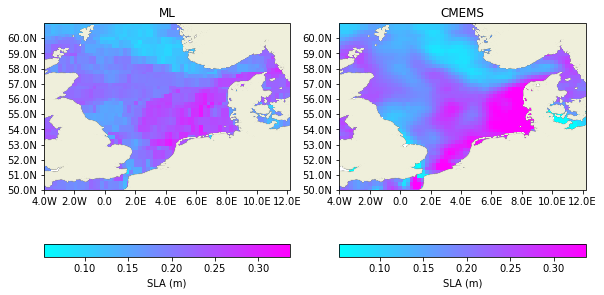

In [54]:
# Single Plot

fig = plt.figure(figsize = (15, 10))

#chosen_date='2004-05-13 15:00:00'
chosen_day='2021-10-24'

alti_20_ML=alti_ML.loc[chosen_day:chosen_day] #- np.nanmean(alti_20_ML.sla_predicted)
#alti_20_ML = alti_ML.loc[alti_ML['time']==chosen_day]
#alti_20_ML = alti_20_ML.set_index(alti_20_ML.times)
min_sl=np.nanmean(alti_20_ML.sla_predicted)-3*np.nanstd(alti_20_ML.sla_predicted)
max_sl=np.nanmean(alti_20_ML.sla_predicted)+3*np.nanstd(alti_20_ML.sla_predicted)


single_plot(alti_20_ML,min_sl,max_sl,1,fig,'ML')

alti_20_cmems=alti_cmems.loc[chosen_day:chosen_day] #- np.nanmean(alti_cmems.sla_predicted)
#alti_20_cmems=alti_20_cmems.groupby([pd.Grouper('lon'),pd.Grouper('lat')]).mean()
#alti_20_cmems['lat'] = alti_20_cmems.index.get_level_values('lat')
#alti_20_cmems['lon'] = alti_20_cmems.index.get_level_values('lon')
#min_sl=np.nanmean(alti_20_cmems.sla_predicted)-3*np.nanstd(alti_20_cmems.sla_predicted)
#max_sl=np.nanmean(alti_20_cmems.sla_predicted)+3*np.nanstd(alti_20_cmems.sla_predicted)


single_plot(alti_20_cmems,min_sl,max_sl,2,fig,'CMEMS')



# alti_20_Copernicus=alti_Copernicus.loc[chosen_day:chosen_day] #- np.nanmean(alti_Copernicus.sla_predicted)
# min_sl=np.nanmean(alti_20_Copernicus.sla_predicted)-np.nanstd(alti_20_Copernicus.sla_predicted)
# max_sl=np.nanmean(alti_20_Copernicus.sla_predicted)+np.nanstd(alti_20_Copernicus.sla_predicted)

# single_plot(alti_20_Copernicus,min_sl,max_sl,3,fig)

#fig.savefig("fig_dailymapsexample.png")